In [2]:
import pandas as pd 
import numpy as np

from tensorflow import keras
import PIL.Image as image
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


In [4]:
import matplotlib.pyplot as plt
import cv2
import os

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
tf.config.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [7]:
IMAGE_SHAPE=(224,224)
classifier=tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [8]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

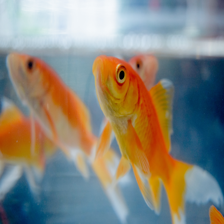

In [9]:
gold_fish=image.open('golfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [10]:
gold_fish=np.array(gold_fish)/255.0

In [11]:
gold_fish.shape

(224, 224, 3)

In [12]:
gold_fish[np.newaxis,...]

array([[[[0.77254902, 0.84313725, 0.89019608],
         [0.78431373, 0.85490196, 0.90196078],
         [0.78823529, 0.85882353, 0.90588235],
         ...,
         [0.25098039, 0.25098039, 0.34901961],
         [0.24313725, 0.24313725, 0.34509804],
         [0.23529412, 0.23529412, 0.3372549 ]],

        [[0.77254902, 0.84313725, 0.89019608],
         [0.78823529, 0.85882353, 0.90588235],
         [0.78431373, 0.85490196, 0.90196078],
         ...,
         [0.26666667, 0.26666667, 0.36078431],
         [0.25490196, 0.25490196, 0.35294118],
         [0.24705882, 0.24705882, 0.34509804]],

        [[0.77647059, 0.84705882, 0.89411765],
         [0.78431373, 0.85490196, 0.90196078],
         [0.77254902, 0.84313725, 0.89019608],
         ...,
         [0.27058824, 0.27058824, 0.36470588],
         [0.2627451 , 0.2627451 , 0.36078431],
         [0.25490196, 0.25490196, 0.35294118]],

        ...,

        [[0.01568627, 0.15294118, 0.21176471],
         [0.0627451 , 0.14509804, 0.21176471]

In [13]:
result=classifier.predict(gold_fish[np.newaxis,...])

1/1 [==============================] - 5s 5s/step


In [14]:
result

array([[ 0.25402603,  2.3435862 , 10.677329  , ..., -3.1598444 ,
         0.08356172, -0.2541218 ]], dtype=float32)

In [15]:
result.shape

(1, 1001)

In [16]:
predicted=np.argmax(result)

In [17]:
image_labels=[]
with open ("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()

In [18]:
image_labels[predicted]

'goldfish'

In [19]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [20]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.',untar=True)

In [21]:
data_dir

'.\\datasets\\flower_photos'

In [22]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [23]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [24]:
roses=list(data_dir.glob('roses/*'))

In [25]:
daisy=list(data_dir.glob('daisy/*'))

In [26]:
dandelion=list(data_dir.glob('dandelion/*'))

In [27]:
sunflower=list(data_dir.glob('sunflower/*'))

In [28]:
tulips=list(data_dir.glob('tulips/*'))

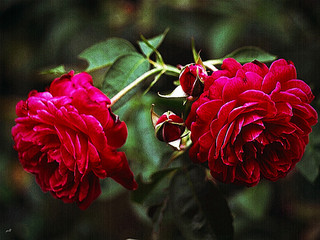

In [29]:
image.open(str(roses[345]))

In [30]:
flower_image_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*'))
                     
}

In [31]:
flower_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [32]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [33]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [36]:
img=cv2.imread(str(flower_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [35]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)